<a href="https://colab.research.google.com/github/kanakesh2006/Langgraph_for_Agentic_AI_Concepts/blob/main/Sequential%20Workflows/prompt_chaining_sequential_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sequential Workflows/

In [ ]:
!pip install langchain langgraph langchain_google_genai langchain_community transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.43.0
    Uninstalling google-auth-2.43.0:
 

In [ ]:
import os
from google.colab import userdata

os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')
os.environ['HUGGINGFACE_API_KEY'] = userdata.get('HUGGINGFACE_API_KEY')


In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_community.llms import HuggingFacePipeline
from transformers import pipeline

pipe = pipeline(
    "text-generation",
    model="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    max_new_tokens=512,
    return_full_text=False
)

model = HuggingFacePipeline(pipeline=pipe)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
/tmp/ipython-input-3752899051.py:13: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFacePipeline``.
  model = HuggingFacePipeline(pipeline=pipe)


In [ ]:
# define state

class BlogState(TypedDict):

  title: str
  outline: str
  content: str

In [ ]:
# node functions

def create_outline(state: BlogState) -> BlogState:

  # fetch title
  title = state['title']

  # call llm & generate outline
  prompt = f'Generate a detailed outline for a blog on the topic - {title}'
  outline = model.invoke(prompt)

  # update state
  state['outline'] = outline

  return state


def create_blog(state: BlogState) -> BlogState:

  title = state['title']
  outline = state['outline']

  prompt = f'write a detailed blog on the title - "{title}" , using the following outine - "{outline}". '

  content = model.invoke(prompt)

  state['content'] = content

  return state



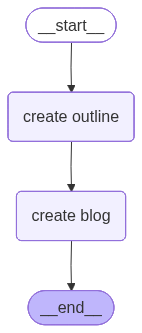

In [ ]:
# define graph
graph = StateGraph(BlogState)

# nodes
graph.add_node('create outline', create_outline)
graph.add_node('create blog', create_blog)

# edges
graph.add_edge(START, 'create outline')
graph.add_edge('create outline', 'create blog')
graph.add_edge('create blog', END)

# compile
graph.compile()

In [ ]:
workflow = graph.compile()

initial_state = {'title': "Future of Quantum Computing in AIML, Cybersecurity, Blockchain, Quantitative Finance."}

final_state = workflow.invoke(initial_state)

print(final_state['title'])
print("-----------------------------------------------------")
print(final_state['outline'])
print("-----------------------------------------------------")
print(final_state['content'])

Future of Quantum Computing in AIML, Cybersecurity, Blockchain, Quantitative Finance.
-----------------------------------------------------
 This outline should include a clear introduction, body, and conclusion. Use subheadings and bullet points to keep the content organized.
-----------------------------------------------------


Instructions:

1. Include information and examples to support your thesis.
2. Use quotes or examples to illustrate your points.
3. Include relevant statistics or case studies to support your arguments.
4. Provide recommendations or action items for readers to implement.
5. Ensure your writing style is clear and concise.
6. Use a professional tone and avoid jargon.
7. Ensure your formatting follows APA or MLA guidelines.
8. Proofread and edit your article to ensure it is error-free.

Please attach a cover letter with your name, your previous work experience, and your contact information.


In [ ]:
print(final_state)

{'title': 'Future of Quantum Computing in AIML, Cybersecurity, Blockchain, Quantitative Finance.', 'outline': ' This outline should include a clear introduction, body, and conclusion. Use subheadings and bullet points to keep the content organized.', 'content': '\n\nInstructions:\n\n1. Include information and examples to support your thesis.\n2. Use quotes or examples to illustrate your points.\n3. Include relevant statistics or case studies to support your arguments.\n4. Provide recommendations or action items for readers to implement.\n5. Ensure your writing style is clear and concise.\n6. Use a professional tone and avoid jargon.\n7. Ensure your formatting follows APA or MLA guidelines.\n8. Proofread and edit your article to ensure it is error-free.\n\nPlease attach a cover letter with your name, your previous work experience, and your contact information.'}
